<a href="https://colab.research.google.com/github/mvajhi/unsupervised-learning/blob/master/HW2/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
import math
from sklearn import linear_model
from IPython.display import display


### Question 1
For a Laplace distribution we can write the negative log likelihood as the following:

$$\ell(y_1,y_2,...,y_n; \mu, \lambda)=-\sum_{i=1}^{n}-\log(2\lambda)-\frac{\lvert y_i-\mu \rvert}{\lambda}$$

Write a function called `laplaceNegLogLikelihood` which takes a vector $\mathbf{y}$ and parameters $\mu$ and $\lambda$ and returns the negative log likelihood. Test your function by calling it with `mu = 0`, `lam = 1` and `y=np.array([2,1,0,0])`.

In [2]:
def laplaceNegLogLikelihood(mu,lam,y):
    # Compute and return nll (negative log likelihood)
    nll = -np.sum(-np.log(2*lam) - abs(y - mu) / lam)
    return nll

#Test your function with these values
mu=0
lam=1
y=np.array([2,1,0,0])

# ****** write your code here ******
# از قبل نوشته شده بود
print(laplaceNegLogLikelihood(mu,lam,y))

5.772588722239782


### Question 2

Write a function called `laplaceRegNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$, a matrix $\mathbf{X}$ of features, and a vector $\mathbf{b}$ of parameters. The function should return the negative log likelihood, assuming that each element of  $\mathbf{y}$ is independent and identically distributed (i.e. Coming from a Laplace distribution) with parameter $\mu = \exp(\mathbf{X}\mathbf{b})$. In your return statement, let `lam=1`. Test your function by calling it with `b=np.array([1,2])`, `X=np.array([[1,1,1],[0,2,1]]).T`, `y=np.array([0,2,10])`


In [3]:
def laplaceRegNegLogLikelihood(b, X, y):
    # Compute mu
    mu = np.exp(X@b)
    #print(mu)
    # Compute negative log likelihood (let lam = 1)
    lam = 1
    nll = laplaceNegLogLikelihood(mu,lam,y)
    return nll

#Test your function with these values
b=np.array([1,2])
X=np.array([[1,1,1],[0,2,1]]).T
y=np.array([0,2,10])
#print(y)

# ****** your code here ******
print('NLL =',laplaceRegNegLogLikelihood(b, X, y))

NLL = 161.29641939590317


### Question 3

Write a function called `modelPredict` which accepts as its first argument $\mathbf{b}$ (exponential model parameters) and a matrix $\mathbf{X}$ (for the exponential model, a column of ones and column of $x_i$ inputs).  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\mathbf{b})$. Test your function by calling it with `b=np.array([1,2])`, `X=np.array([[1,1,1],[0,2,1]]).T`.

In [4]:
def modelPredict(b,X):
    #Compute yhat
    yhat = np.exp(X@b)
    return yhat

#Test your function with these values
b=np.array([1,2])
X=np.array([[1,1,1],[0,2,1]]).T
# print(X)

# ****** your code here ******
print('yhat =',modelPredict(b,X))

yhat = [  2.71828183 148.4131591   20.08553692]


### Question 4

Write a function called `modelFit` which accepts matrix $\mathbf{X}$ and outcomes vector $\mathbf{y}$ as arguments. The function should return a prediction for $\mathbf{b}$ which maximizes the Laplace Log Likelihood. Test your function with `X=np.array([[1,1,1],[0,2,1]]).T`, `y=np.array([0,2,10])`. Which values do you get for $\mathbf{b}$? Print these values.

In [5]:
def modelFit(X,y):
    b_init = np.zeros(X.shape[1])
    # Start from b_init. Use so.minimize to get a prediction for b which maximizes Laplace Log Likelihood
    RES = so.minimize(laplaceRegNegLogLikelihood, b_init, args=(X,y), method="Powell", tol = 1e-8)
    return RES.x

#Test your function with these values
X = np.array([[1,1,1],[0,2,1]]).T
y = np.array([0,2,10])

# ****** your code here ******
b0,b1= modelFit(X,y)
print("b0: ",b0," | b1: ",b1)

b0:  0.6931467179918052  | b1:  2.312859674421409e-07


### Question 5

Load in the data from `Q2.csv`. This is a toy dataset which is meant to illustrate geyser eruption times vs. waiting times (until a particular eruption event). "x" in this dataset is $\frac{1}{\text{eruption length}}$ ($\text{minutes}^{-1}$) for a particular eruption. "y" in this dataset describes the waiting time until said eruption (minutes). Plot a scatterplot of the data. Include axis labels.

<bound method NDFrame.head of             x         y
0    3.738644  0.998547
1    3.731258 -0.000583
2    4.173630  0.000343
3    4.000001 -0.000265
4    3.667144 -0.000740
..        ...       ...
995  2.939044  1.000650
996  2.047948  8.001784
997  2.434406  2.999489
998  3.315642  2.998974
999  3.316767  0.998718

[1000 rows x 2 columns]>


Text(0, 0.5, 'y = Waiting times (minutes)')

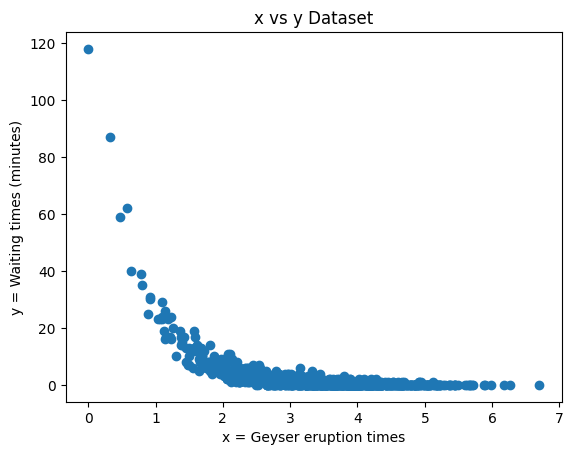

In [6]:
# Load in the data
df = pd.read_csv("/content/Q2.csv")
print(df.head)
# Plot a scatterplot with labels
# ****** your code here ******
plt.scatter(df["x"],df["y"])
plt.title("x vs y Dataset")
plt.xlabel("x = Geyser eruption times")
plt.ylabel("y = Waiting times (minutes)")

### Question 6

Fit a Laplace regression to this data using the functions you wrote above. To recap: here you will find parameters $\mathbf{b}$ (from $\mu = \exp(\mathbf{Xb}))$ which maximize the Laplace Log Likelihood for our Q2 data. Plot the model predictions (`y_pred`) over a set of new x-values $x_{new} \in [0,6]$ (you can use np.linspace for this) in addition to a scatterplot of the data (i.e. plot points + fit).  

Text(0, 0.5, 'y = Waiting times (minutes)')

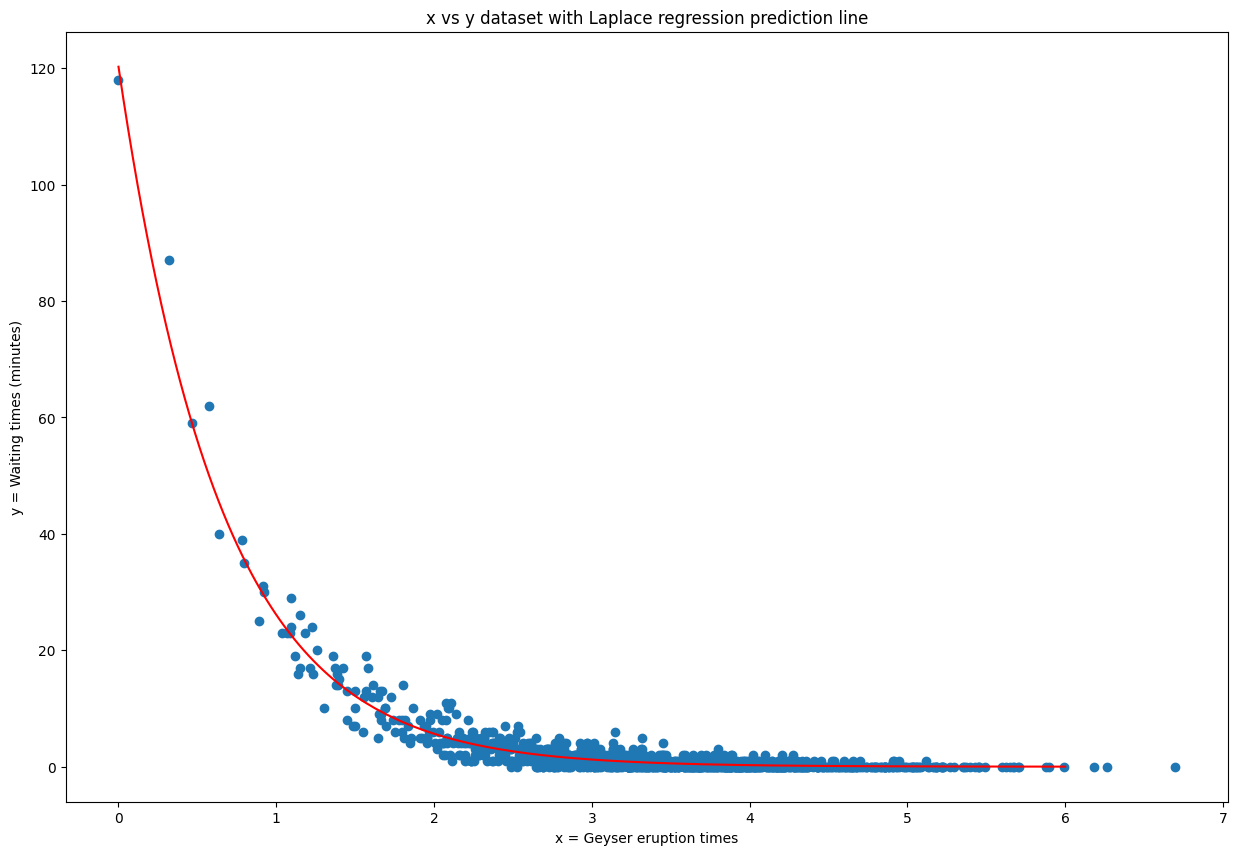

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
#First, construct the matrix X (with a column of ones and a column of x values)
x = df.x.values
X = np.c_[np.ones(x.size),x]
#Next, find b by calling modelFit. modelFit should optimize the laplaceRegressionNegLogLikelihood
y = df.y.values
b = modelFit(X,y)

# For our prediction we need to create new x data (use linspace) and put it in matrix X
x_new = np.linspace(0,6, 200)
X_new = np.c_[np.ones(x_new.size), x_new]

# Use modelPredict to get y_pred [ /2 marks]
y_pred = modelPredict(b, X_new) #yhat
#print(y_pred)

#Plot the data points and predictions on the same plot; color the predictions red
# ****** your code here ******
plt.scatter(df['x'],df['y'])
plt.plot(X_new[:,1],y_pred, color='red')
plt.title("x vs y dataset with Laplace regression prediction line")
plt.xlabel("x = Geyser eruption times")
plt.ylabel("y = Waiting times (minutes)")
#plt.plot(X_new,y_pred,c='r')

### Question 7

Finally, apply linear regression (L2, also called "OLS") to the data, obtain parameter estimates and plot the predictions over the same range as in Question 6 (i.e. $x \in [0,6]$). Do you see a problem with the linear regression? Explain why this might be a problem in a sentence or two.

Text(0, 0.5, 'y = Waiting times (minutes)')

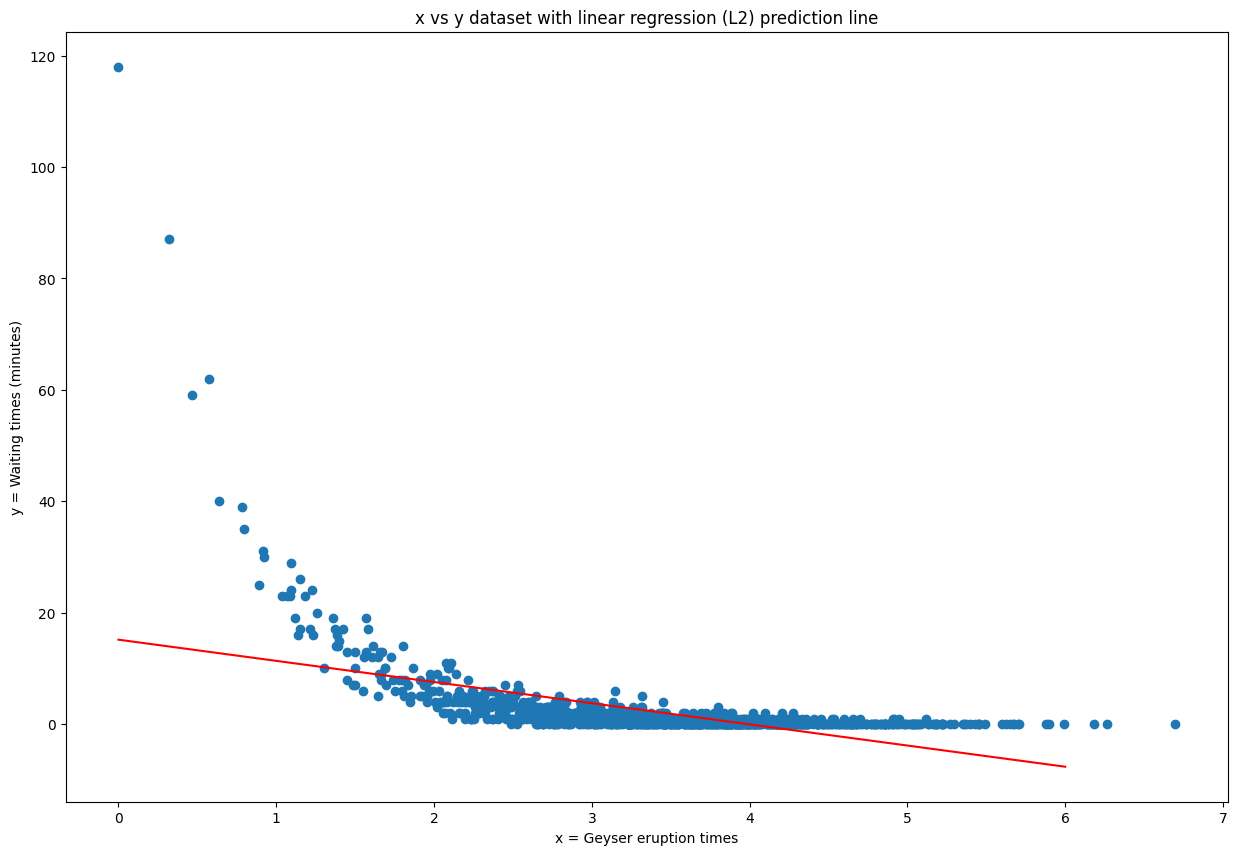

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

#First, construct the matrix X (with a column of ones and a column of x values)
x = df.x.values
X = np.c_[np.ones(x.size),x]

# Get y values, then use sklearn's linear_model.LinearRegression().fit() to create an L2 fit (using X and y)
y = df.y.values
L2_fit = linear_model.LinearRegression().fit(X,y)

# For our prediction we need to create new x data (use linspace) and put this in matrix X_new
x_new = np.linspace(0,6, 200)
X_new = np.c_[np.ones(x_new.size), x_new]

# Use sklearn's "predict" method to get your prediction, given an input matrix X_new y_pred_L2
y_pred_L2 = L2_fit.predict(X_new)
#print(y_pred_L2)
# Plot the data and linear regression on the same figure. Label axes
# ****** your code here ******
plt.scatter(df['x'],df['y'])
plt.plot(X_new[:,1],y_pred_L2, color='red')
plt.title("x vs y dataset with linear regression (L2) prediction line")
plt.xlabel("x = Geyser eruption times")
plt.ylabel("y = Waiting times (minutes)")

Why is it a problem?

In [9]:
print("The dataset has a wide range of points scattered though the graph. A Linear regression model is not able to obtain a descent predicion as it does not take into account some of the outliers (not robust to outliers). Instead Linear regression model is underfitted. In contrast, the Laplacian regression is a much better fit as it subtracts each point's y value from the y value of the line at that x value (Laplace distribution formula). This is is the residual for that point.")

The dataset has a wide range of points scattered though the graph. A Linear regression model is not able to obtain a descent predicion as it does not take into account some of the outliers (not robust to outliers). Instead Linear regression model is underfitted. In contrast, the Laplacian regression is a much better fit as it subtracts each point's y value from the y value of the line at that x value (Laplace distribution formula). This is is the residual for that point.


## تمامی سوالات این بخش (سوال ۲ تکلیف ۲) با جواب بارگزاری شده بود